In [11]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
import scipy
import pylab as pl
import matplotlib.cm as cm
%matplotlib inline

input_shape = (150, 150, 3)
img_width = 150
img_height = 150

nb_train_samples = 29232
nb_validation_samples = 7344
batch_size = 16
epochs = 50

train_data_dir = 'dataset/train'
validation_data_dir = 'dataset/val'

# Creating our data generator for our test data
validation_datagen = ImageDataGenerator(
    # used to rescale the pixel values from [0, 255] to [0, 1] interval
    rescale = 1./255)

# Creating our data generator for our training data
train_datagen = ImageDataGenerator(
      rescale = 1./255,              # normalize pixel values to [0,1]
      #rotation_range = 30,           # randomly applies rotations
      #width_shift_range = 0.3,       # randomly applies width shifting
      #height_shift_range = 0.3,      # randomly applies height shifting
      horizontal_flip = False,        # randonly flips the image
      fill_mode = 'nearest')         # uses the fill mode nearest to fill gaps created by the above

# Specify criteria about our training data, such as the directory, image size, batch size and type 
# automagically retrieve images and their classes for train and validation sets
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'categorical',
        shuffle = True)

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'categorical',
        shuffle = False)    

Found 29232 images belonging to 36 classes.
Found 7344 images belonging to 36 classes.


In [12]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD 
import os

batch_size = 16
epochs = 20

img_rows = 150
img_cols = 150
input_shape = (img_rows, img_cols, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(36, activation='softmax'))
#model.add(Activation('sigmoid'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_9 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_10 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 64)       

In [13]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/20
1827/1827 [==============================] - 326s 178ms/step - loss: 1.7286 - accuracy: 0.5341 - val_loss: 0.9056 - val_accuracy: 0.8877
Epoch 2/20
1827/1827 [==============================] - 339s 186ms/step - loss: 0.6603 - accuracy: 0.8149 - val_loss: 1.1167 - val_accuracy: 0.9222
Epoch 3/20
1827/1827 [==============================] - 348s 191ms/step - loss: 0.4909 - accuracy: 0.8557 - val_loss: 0.8651 - val_accuracy: 0.9385
Epoch 4/20
1827/1827 [==============================] - 342s 187ms/step - loss: 0.4039 - accuracy: 0.8776 - val_loss: 0.7207 - val_accuracy: 0.9514
Epoch 5/20
1827/1827 [==============================] - 357s 195ms/step - loss: 0.3411 - accuracy: 0.8935 - val_loss: 0.6893 - val_accuracy: 0.9528
Epoch 6/20
1827/1827 [==============================] - 351s 192ms/step - loss: 0.2992 - accuracy: 0.9049 - val_loss: 0.5240 - val_accuracy: 0.9586
Epoch 7/20
1827/1827 [==============================] - 342s 187ms/step - loss: 0.2716 - accuracy: 0.9104 - val_

In [14]:
from string import ascii_uppercase
dict=[]
for i in range(0,10):
    dict.append(str(i))
for c in ascii_uppercase:
    dict.append(str(c))

In [15]:
model.save("Trained_Models/ocr_augmented150v3_96%.h5")

In [7]:
import cv2
import numpy as np
from keras.models import load_model

classifier = load_model('Trained_Models/ocr_augmented150v3_96%.h5')

def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    pred1=dict[pred]
    #expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    #expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    #cv2.putText(expanded_image, str(pred), (252, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2)
    #cv2.imshow(name, expanded_image)
    print(pred)

input_im = cv2.imread('C:/Users/JOY/Downloads/EnglishImg (1)/test/Sample002/img002-00079.png')

imageL = cv2.resize(input_im, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
cv2.imshow("Test Image", imageL)


input_im=cv2.resize(input_im,(100,100),interpolation = cv2.INTER_AREA)
input_im = input_im.reshape(1,100,100,3)
input_im = input_im.astype('float32')
input_im/=255
 
    ## Get Prediction
res = classifier.predict_classes(input_im, 1, verbose = 0)[0]
print(dict[res])
    #draw_test("Prediction", res, imageL) 
cv2.waitKey(0)

cv2.destroyAllWindows()

1


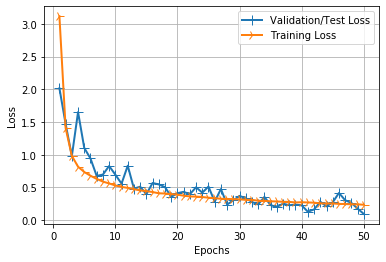

In [22]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

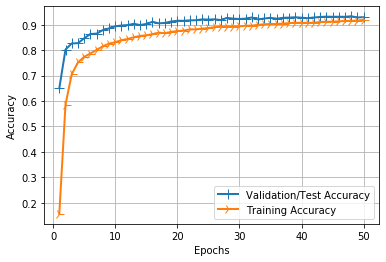

In [23]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [25]:
# Save our model diagrams to this path
from keras.utils.vis_utils import plot_model
model_diagrams_path = 'G:/Projects/Minor/Codes/Trained_Models/'

# Generate the plot
plot_model(model, to_file = model_diagrams_path + 'model_plot.png',
           show_shapes = True,
           show_layer_names = True)

# Show the plot here
path=model_diagrams_path + 'model_plot.png'
print(path)
img = cv2.imread(path)
cv2.imshow("Model Plot",img)

G:/Projects/Minor/Codes/Trained_Models/model_plot.png
